In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

In [2]:
# importing data
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [3]:
print(data.shape)

(11914, 16)


In [5]:
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
cols = ['Make',
        'Model',
        'Year',
        'Engine HP',
        'Engine Cylinders',
        'Transmission Type',
        'Vehicle Style',
        'highway MPG',
        'city mpg',
        'MSRP']
data = data[cols]
data.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [10]:
# renaming columns
data.columns = data.columns.str.replace(' ', '_').str.lower()
data = data.rename(columns={'msrp': 'price'})
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

In [11]:
# missing values
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [12]:
# fill missing values with 0
data.fillna(0, inplace=True)

### Question 1

In [16]:
data.describe(include=["O"])

,make,model,transmission_type,vehicle_style
count,11914,11914,11914,11914
unique,48,915,5,16
top,Chevrolet,Silverado 1500,AUTOMATIC,Sedan
freq,1123,156,8266,3048


In [13]:
data['transmission_type'].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

### Question 2

In [18]:
# numerical features only
data_numeric = data.copy()
data_numeric = data.drop(["make", "model", "transmission_type", "vehicle_style"], axis=1)
data_numeric.describe()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,247.941749,5.614655,26.637485,19.733255,4.059474e+04
std,7.579740,110.507669,1.800554,8.863001,8.987798,6.010910e+04
min,1990.000000,0.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,22.000000,16.000000,2.100000e+04
50%,2015.000000,225.000000,6.000000,26.000000,18.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,30.000000,22.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


In [19]:
data_numeric.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


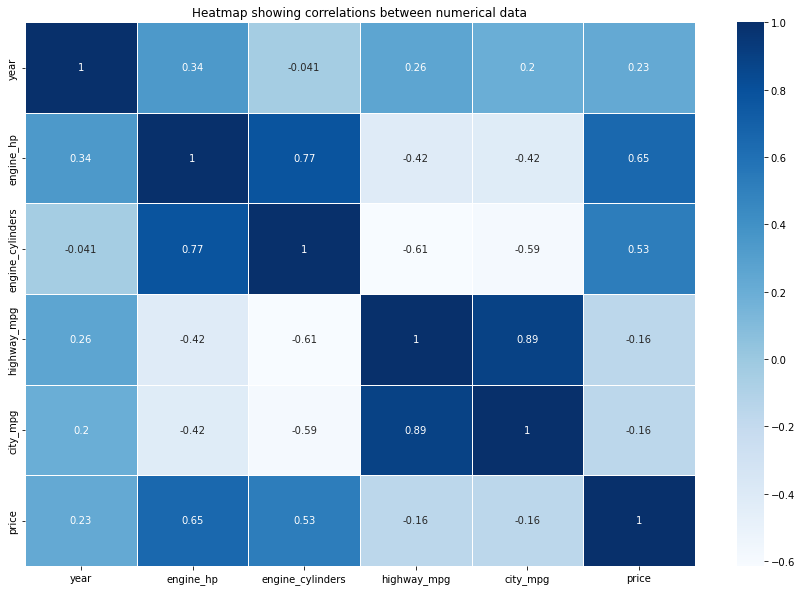

In [20]:
# heatmap
plt.figure(figsize=(15,10))  
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [21]:
# making price binary
data_class = data.copy()
mean = data_class['price'].mean()

data_class['above_average'] = np.where(data_class['price']>=mean,1,0)

In [22]:
# dropping price column
data_class = data_class.drop('price', axis=1)

In [23]:
# splitting the dataset
df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [24]:
# dropping index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

### Question 3

In [26]:
# calculating the mutual information
cat = ["make", "model", "transmission_type", "vehicle_style"]

def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
model,0.462344
make,0.239769
vehicle_style,0.084143
transmission_type,0.020958


### Question 4

In [ ]:
# dropping y
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [28]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20


In [29]:
# transforming the dataset
num = ["year", "engine_hp", "engine_cylinders", "highway_mpg", "city_mpg"]
train_dict = df_train[cat + num].to_dict(orient='records')

# vectorising the dataset
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [30]:
# training LR
model = LogisticRegression(solver="liblinear", C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# estimating on val dataset
val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.95


### Question 5

In [31]:
features = cat + num
features

['make',
 'model',
 'transmission_type',
 'vehicle_style',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [32]:
# feature elimination
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

make 0.0007763323541754019 0.9492236676458246
model 0.025954678976080503 0.9240453210239195
transmission_type 0.004972723457826178 0.9450272765421738
vehicle_style 0.007490558120016755 0.9425094418799832
year 0.0020352496852705793 0.9479647503147294
engine_hp 0.019660092320604283 0.9303399076793957
engine_cylinders 0.0028745279060008455 0.9471254720939991
highway_mpg 0.005812001678556444 0.9441879983214435
city_mpg 0.004133445237096023 0.9458665547629039


### Question 6

In [34]:
# logarithmic transformation
data['price']=np.log1p(data['price'])

In [35]:
# preparing the dataset
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [36]:
# vectorising the dataset
train_dict = df_train[cat + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [37]:
# ridge regression
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 0.494
0.01 0.494
0.1 0.494
1 0.494
10 0.494
